### Assignment 9.2


Implement the K-Means algorithm using only the simplest Python language constructs and the Numpy library.

#### Solution

In [1]:
import numpy as np
import collections
from collections import defaultdict

##### Additional class and  funtions definition 

In [2]:
class point:
    def __init__(self, x):
        self.x = x

    def count_distance(self, p):
        return np.linalg.norm(self.x - p.x)

    def set_cluster(self, cluster):
        self.cluster = cluster
        
        
def step(points, centers):
    for point in points:
        distances = [point.count_distance(centers[k]) for k in centers.keys()]
        cluster = np.argmin(distances) + 1
        point.set_cluster(cluster)
    return points  


def find_centers(points):
    clusters = defaultdict(list)
    centers = {}
    for p in points:
        clusters[p.cluster].append(p)
    for k in clusters.keys():
        centers[k] = point(points_mean(clusters[k]))
    return centers        


def update(points, centers, rjm):
    if rjm:
        centers = find_centers(points)
    else:
        points = step(points, centers)
    return points, centers, 1-rjm

def points_mean(points_list):
    x_sum = np.zeros_like(points_list[0].x)
    for p in points_list:
        x_sum += p.x
    return x_sum/len(points_list)


##### KMeans

In [3]:

class KMeans(object):
    def __init__(self, K, init):
        self.K = K
        self.centers = {}
        
        for k in range(self.K):
            self.centers[k + 1] = point(init[k, :])

    def fit(self, X):
        points = [point(X[i, :]) for i in range(X.shape[0])]
        rjm, e = 0, 1.

        while e >= 1.e-3:
            points, cent_i, rjm = update(points, self.centers, rjm)
            if not rjm:
                e = np.max([ np.abs(cent_i[k].x - self.centers[k].x) for k in cent_i.keys() ])
                self.centers = cent_i
                
        return self

    def predict(self, X):
        points = [point(X[i, :]) for i in range(X.shape[0])]
        points = step(points, self.centers)
        clusters = [p.cluster for p in points]
        return np.array(clusters)

#### An example of how the algorithm works on a synthetic data set

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (6, 4.8)

In [5]:
X2 = pd.read_csv('Task_9/6.csv', index_col=None).values[:, 1:]
c_init = np.array([[0, -1], [0, 0], [2,1]])

kmeans = KMeans(3, c_init).fit(X2[:, :2])

Text(0.5, 1.0, 'Cluster centers found by the algorithm')

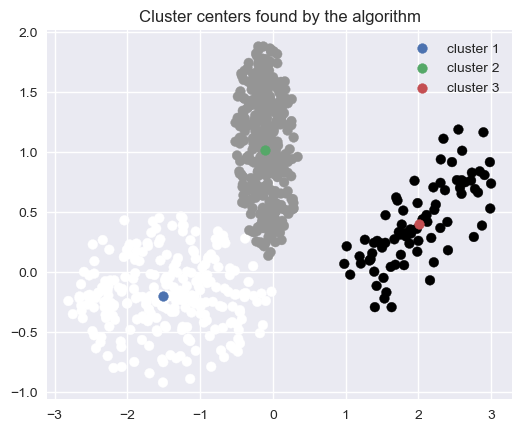

In [6]:
plt.scatter(X2[:, 0], X2[:, 1], c=X2[:, 2])
test = np.array([[3., 0.], [2, 2]])

for k in kmeans.centers.keys():
    plt.scatter(kmeans.centers[k].x[0], kmeans.centers[k].x[1], label=f'cluster {k}')
    
plt.legend()
plt.title('Cluster centers found by the algorithm')

In [7]:
kmeans.predict(test)

array([3, 3])